In [1]:
import matplotlib.pyplot as plt
import dxchange
from opencvBF import bilateral_filter_multiproc
from fastBF2D import bilateral_numpy_fast
from fastBF3D import bilateral_numpy_fast_3D, find_min_max

### 1. Load data

In [2]:
f = dxchange.read_tiff_stack(f'data/recon_00000.tiff',ind=range(16))   
mmin,mmax=find_min_max(f[0])
f[f<mmin]=mmin
f[f>mmax]=mmax

### 2. Estimate sigmarange using ImageJ

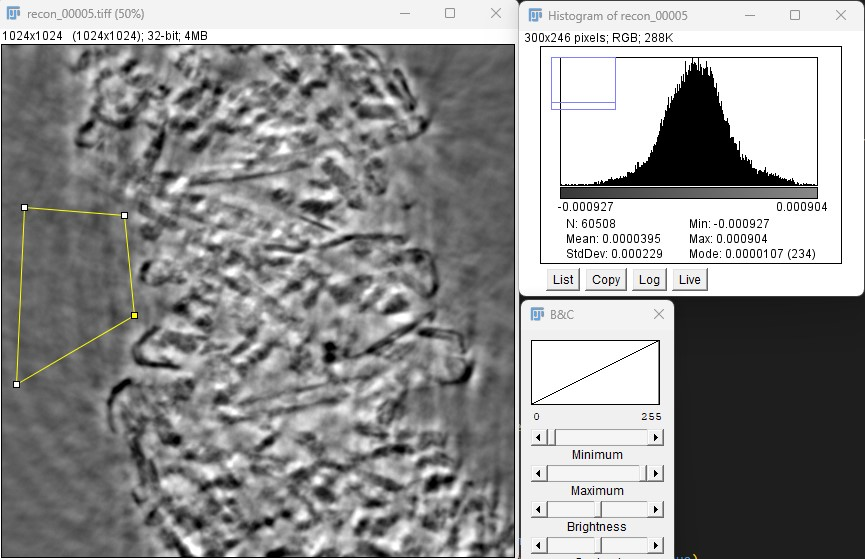

In [3]:
'''
sigmarange = StdDev of noise you want to blur
if the image is not completely filtered, sigmarange value should be increased
if the image is overfiltered, sigmarange value should be reduced or sigmaspatial should be increased
'''
sigmarange = 9.29e-4

### 3. Use BF_3D

In [4]:
d = 15 # for openCV implementation
sigmaspatial = 50

fr_2d = bilateral_numpy_fast(f[0], sigmaspatial, sigmarange, samplespatial=None, samplerange=None)
fr_3d = bilateral_numpy_fast_3D(f, sigmaspatial, sigmarange, samplespatial=None, samplerange=None)
fr_opencv = bilateral_filter_multiproc(f, d, sigmarange, 50, processes = 4, nchunks = 4)

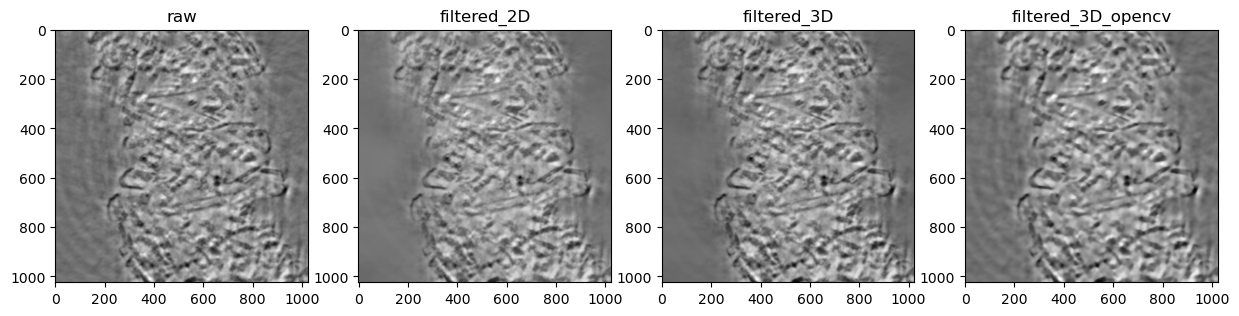

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(15,7))

for i, (img, title) in enumerate(zip([f[0], fr_2d, fr_3d[0], fr_opencv[0]], 
                                     ['raw', 'filtered_2D', 'filtered_3D', 'filtered_3D_opencv'])):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(title)